<a href="https://colab.research.google.com/github/ehsan74814/Preprocessing_Data/blob/main/logisticRegression_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Data exploration**

### 1.0) importing Packasges

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [92]:
warnings.filterwarnings('ignore')

### 1.1) getting data

In [93]:
df = pd.read_csv("/content/drive/MyDrive/Training ML/logisticRegression/winequalityN.copy.csv")

In [94]:
df = df.drop(columns='type', axis=1)

In [95]:
correlation_matrix = df.corr()

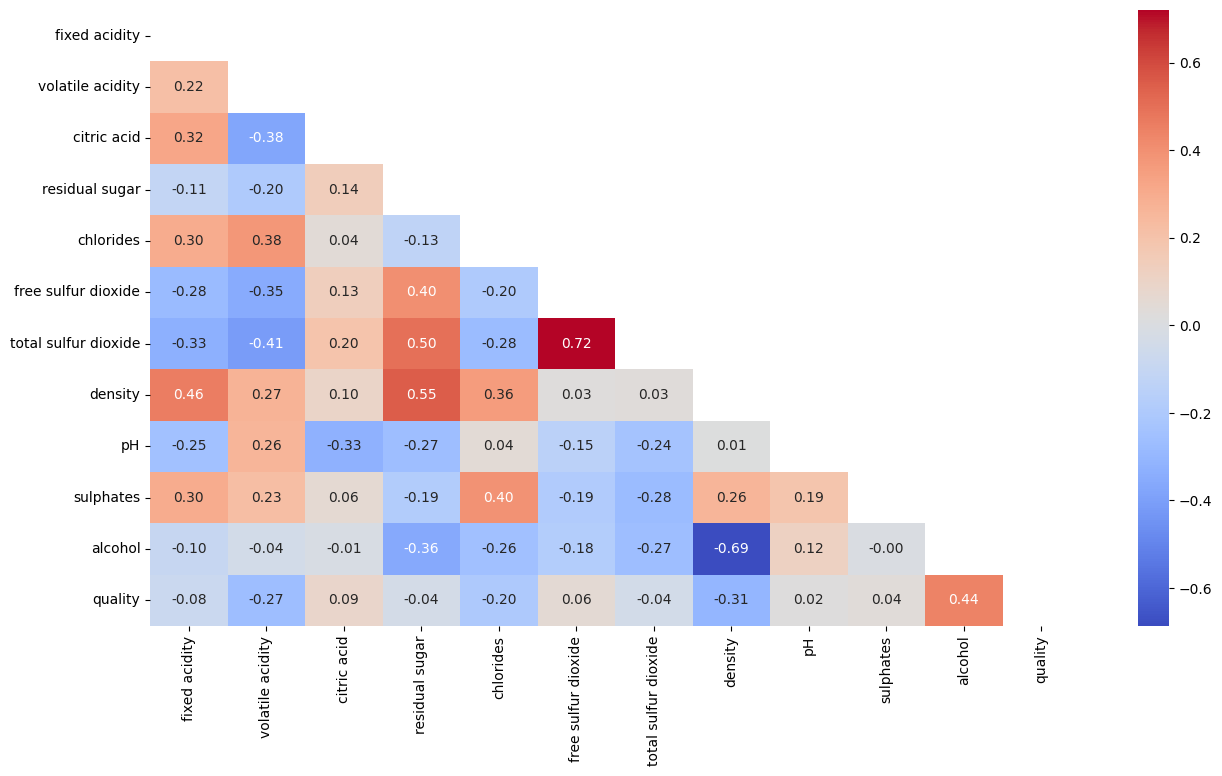

In [96]:
mask =np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,mask= mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True )
plt.show()

In [97]:
df = df.drop(columns='free sulfur dioxide', axis=1)

In [98]:
df = df.drop(columns='density', axis=1)

### 1.2) About Data

In [ ]:
df.info()

### 1.3) First 5 Rows

In [ ]:
df.head()

# **2) Checking for NULL values**

In [ ]:
df.isnull().sum()

In [ ]:
sum = df.isnull().sum()
pd.concat([sum], axis=1, keys=["Sum"])  #.sort_values(by='Sum', ascending=False)

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df[df['fixed acidity'].isnull()]

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
df.info()

## **2.0) filling of the row data**

In [105]:
df = df.fillna(df.mean())

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# **3) outliner**

In [ ]:
plt.figure(figsize=(15,12))
df.boxplot(vert=False,widths=0.7, patch_artist=True, notch=True, color='red')
plt.xlim(0,200)
plt.show()

In [109]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 +  1.5*IQR

df = df[(df >=lower_bound) & (df <=upper_bound)]

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,12))
df.boxplot(vert=False,widths=0.7, patch_artist=True, notch=True, color='red')
plt.xlim(0,200)
plt.show()

In [ ]:
df.isnull().sum()